<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/200925_4%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EA%B8%B0%EC%B4%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


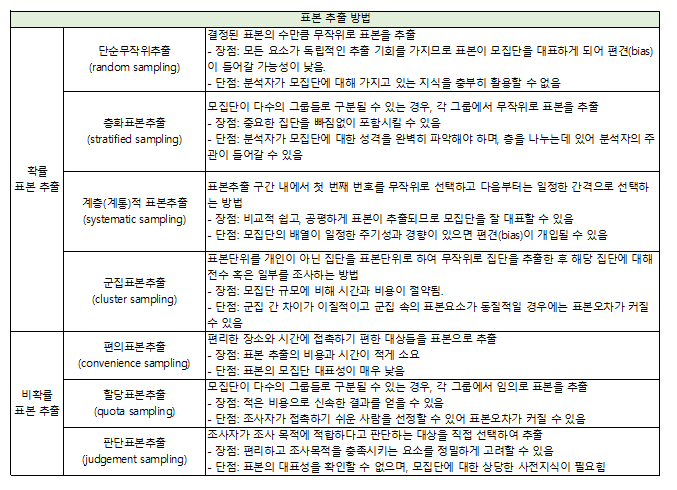

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv', sep=',', encoding='CP949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


# 1.표본추출 실습

## 1.1.무작위 표본추출

In [5]:
data_temp = df.sample(n=10, replace=False, random_state=123)  # n=표본개수, replace=복원추출여부, random_state=사용할 난수 값
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,5,5,1,3,1052,0,3,6,7,4,5,5,3,4,6,7,6,6.0,6.0,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,7,7,1,4,1085,0,7,7,7,6,7,7,6,7,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,5,5,0,3,946,1,6,6,6,2,3,4,6,3,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,7,7,1,7,1083,0,3,7,7,5,7,7,6,7,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,5,5,1,5,1090,0,6,6,7,5,6,7,6,6,7,6,5,6.0,6.0,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,7,7,1,9,1089,0,5,5,7,3,7,6,5,6,6,5,6,6.0,6.0,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,5,5,1,9,938,0,7,7,6,3,4,5,7,7,5,5,6,7.0,6.0,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,5,5,1,1,1051,0,4,5,7,5,5,6,6,5,5,6,6,5.0,5.0,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,2,2,1,3,679,0,5,5,6,3,4,5,5,6,7,5,6,7.0,6.0,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,5,5,1,5,927,0,3,4,5,3,2,5,4,5,5,4,5,4.0,5.0,7,7,6,7,6,5,4,5,5,5


## 1.2.조건을 만족하는 레코드 추출하기
- 고객 이탈여부 0(미이탈), 1(이탈)

In [6]:
churn_customer = df[df.이탈여부==1]
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,6,6,1,5,615,0,2,6,2,2,6,4,4,4,5,6,6,6.0,NaN,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,6,6,1,8,693,0,5,6,2,3,1,4,5,6,6,5,7,NaN,NaN,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,4,4,1,3,528,0,5,6,1,2,5,4,5,6,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,3,3,1,3,549,0,4,7,2,2,6,3,4,6,5,7,6,6.0,7.0,6,7,6,6,7,5,7,6,6,6


## 1.3.특정 필드 추출하기

In [7]:
df_1 = df[['고객ID','방문빈도']]
df_1.head()

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73


## 1.4.데이터 분할하기

In [8]:
under_500 = df[df.고객ID<=500]
upper_500 = df[df.고객ID>500]
under_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
495,496,0,3950410,18,219467,5,132345,2,2,0,4,4,1,2,1086,0,2,6,7,3,3,4,6,4,6,5,5,6.0,NaN,6,6,6,6,5,5,6,5,6,5
496,497,0,11398490,24,474937,22,350550,1,4,0,5,5,1,3,1058,0,6,6,7,4,6,7,6,7,7,7,6,NaN,NaN,6,7,6,5,6,6,5,5,6,6
497,498,0,5027350,28,179548,12,303250,1,4,0,5,5,1,4,1080,0,3,5,7,4,4,4,3,4,6,5,5,6.0,NaN,6,6,6,6,5,5,6,5,6,5
498,499,0,8624590,15,574973,17,365145,1,3,0,6,6,1,6,1060,0,4,4,7,3,6,3,5,6,4,5,6,5.0,4.0,4,6,5,5,6,5,4,5,5,5
499,500,0,10916910,29,376445,8,260450,2,2,0,4,4,1,3,1065,1,3,6,7,4,6,5,4,5,6,4,4,6.0,6.0,4,6,4,7,7,5,6,7,5,6


## 1.5.데이터 추가하기

In [9]:
df_join=under_500.append(upper_500,ignore_index=True)   # ignore_index=합쳐지는 데이터의 인덱스 유지 여부 
df_join

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


## 1.6.데이터 병합하기

In [10]:
df_1 = df[['고객ID','방문빈도']]
df_2 = df[['고객ID','총_매출액']]
df_merge = df_1.merge(df_2)
df_merge.head()

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950


# 2.파생변수의 생성

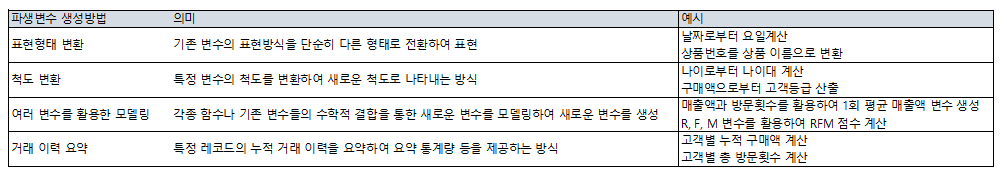


## 2.1.표현형태 변환하기
- 남자 = 0, 여자 = 1로 변환하여 새로운 컬럼 생성

In [11]:
import numpy as np
df['남녀']=np.where(df.성별 == 0,'남자','여자')   # where 조건 만족하면 '남자'로 출력, 아니면 '여자'로 출력
df[['고객ID','성별','남녀']]

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자
...,...,...,...
995,996,1,여자
996,997,0,남자
997,998,0,남자
998,999,1,여자


## 2.2.척도 변환하기

In [12]:
df['New고객등급'] = np.where(df.총_매출액>=5000000,'상',np.where(df.총_매출액>=3000000,'중','하'))
df[['고객ID','총_매출액','New고객등급']]

,고객ID,총_매출액,New고객등급
0,1,4007080,중
1,2,3168400,중
2,3,2680780,하
3,4,5946600,상
4,5,13745950,상
...,...,...,...
995,996,5135090,상
996,997,10315690,상
997,998,2741290,하
998,999,11268990,상


## 2.3.모델링을 활용해 파생변수 생성하기

In [13]:
df['New_1회_평균매출액']=df['총_매출액']/df['방문빈도']
df[['고객ID','총_매출액','방문빈도','New_1회_평균매출액']]

,고객ID,총_매출액,방문빈도,New_1회_평균매출액
0,1,4007080,17,235710.588235
1,2,3168400,14,226314.285714
2,3,2680780,18,148932.222222
3,4,5946600,17,349800.000000
4,5,13745950,73,188300.684932
...,...,...,...,...
995,996,5135090,8,641886.250000
996,997,10315690,49,210524.285714
997,998,2741290,10,274129.000000
998,999,11268990,15,751266.000000


## 2.4.거래이력 요약을 통한 파생변수 생성하기
- 이탈여부에 따른 '총 매출액 합계' 데이터 생성

In [14]:
churn_customer = df[df.이탈여부==1]
Non_churn_customer = df[df.이탈여부==0]
print(sum(churn_customer.총_매출액))
print(sum(Non_churn_customer.총_매출액))

373918850
6694770910


# 3.유용한 통계 그래프

## 3.1.히스토그램
- 원하는 범주에 따라 해당 범주의 빈도를 막대로 표현함
- 빈도의 수준과 상대적 크기 차이를 판단 가능
- 각 계급 기둥 간 간격이 없어야 함
- 각 계급간 구간들은 일치해야 함
- 보통 면적은 1, 사각형의 높이 = 계급의 상대도수/계급간격

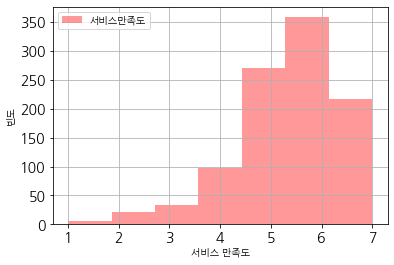

In [24]:
plt.hist(df['서비스_만족도'],alpha=0.4, bins=7, rwidth=1, color='red', label='서비스만족도')
plt.legend()
plt.grid()
plt.xlabel('서비스 만족도')
plt.ylabel('빈도')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- 시각화 결과, 서비스만족도는 5점, 6점, 7점에 대부분 분포되어 있음
- 점수를 낮게 평가한 고객들의 빈도 수가 낮음
- 낮은 만족도를 나타낸 소수의 고객들에 대한 불만족 원인을 파악하여 개선점 찾아야 함

## 3.2. 산점도
- 변수간의 관계를 대략적으로 파악 가능
- 그러나 변수 간의 상관계수와 같은 통계적인 검증은 불가능

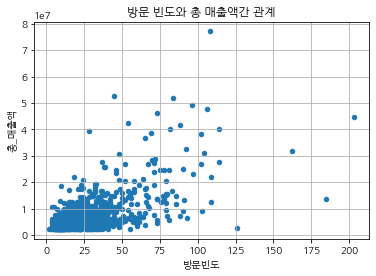

In [25]:
df.plot.scatter(x='방문빈도',y='총_매출액',grid=True,title='방문 빈도와 총 매출액간 관계')

- 방문빈도와 매출액 사이에는 어느 정도 상관관계가 있음
- 특히, 방문빈도 50회 전후에서 방문빈도에 따라 매출액의 증가가 비교적 명확하게 나타남
- 방문빈도 50회 이상부터는 매출액의 편차가 크게 나타남
- 그러므로, 우량고객 되기 전 매장방문 유도 + 우량고객 된 후 방문구매액 증대 전략 수행이 바람직함

## 3.3.파이차트
- 명목형 변수의 구성요소 간 전체 비율구조를 알 수 있음.
- 작은 비율의 구성요소도 잘 나타남

In [27]:
groupby_구매유형 = df.groupby('구매유형')
groupby_구매유형.describe()

고객ID                          ...   New_1회_평균매출액                             
      count        mean         std  ...            50%            75%           max
구매유형                                 ...                                            
1      43.0  523.186047  286.875886  ...  364625.000000  414084.375000  4.897520e+05
2     317.0  476.406940  282.585411  ...  193453.666667  268758.923077  4.966717e+05
3     144.0  514.868056  287.815069  ...  630736.878669  786918.432540  2.680100e+06
4     496.0  509.760081  293.080306  ...  248438.571429  344615.297203  4.994987e+05

[4 rows x 312 columns]

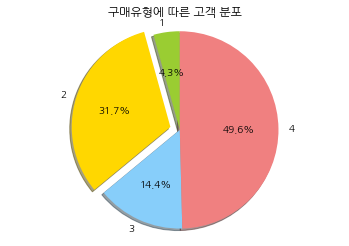

In [39]:
labels = ['1','2','3','4']
sizes = [43, 317, 144, 496]   # 각각 고객 수(고객ID count한 값)
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode = ( 0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=90)  # autopct: 파이차트 안에 % 표현하는 방식
plt.axis('equal')
plt.title('구매유형에 따른 고객 분포')
plt.show()

- 전체 고객의 약 50%가 4번 그룹에 집중 구매형 고객군에 속함
- 1회성 구매영은 43명.
- 본 데이터는 VIP 고객들만 추출

## 3.4. 상자그림
- 수치형 변수의 분포적 특성을 비교적 자세히 나타냄
- 히스토그램의 단점(구체적인 특성까지 파악 불가) 보완
- 분포의 대략적인 형태, 다양한 통계량 제시 가능


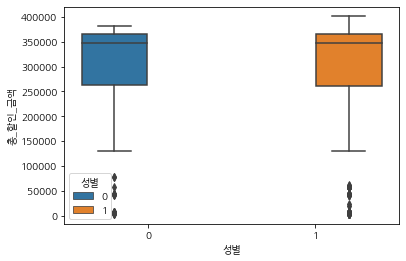

In [41]:
sns.boxplot(x='성별',y='총_할인_금액',hue='성별',data=df)

- 성별에 따른 할인금액 수준을 비교
- 여성이 남성보다 최대 할인금액이 높음
- 그러나 최소값, 평균, 그리고 제 1사분위, 2사분위, 3사분위의 차이가 크지 않음
- 성별에 따라 할인쿠폰 사용 수준이 크레 다르지 않음 > 성별에 따른 할인쿠폰 제도 불필요